In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from PIL import Image

from tensorflow import keras as ks
from keras.applications import vgg16

# I- Data Preparation

In [2]:
# Load the tarin and test datasets
cifar10 = ks.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Split train dataset into train and validation sets
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [4]:
# Train, val and test size
print('Training dataset size:', str(y_train.shape[0]))
print('Validation dataset size:', str(y_val.shape[0]))
print('Testing dataset size:', str(y_test.shape[0]))

Training dataset size: 40000
Validation dataset size: 10000
Testing dataset size: 10000


In [5]:
# Label encoder used for data augmentation labels
le = LabelEncoder()
le.fit(y_train.ravel())
y_train_encoded = le.transform(y_train.ravel())
y_val_encoded = le.transform(y_val.ravel())
y_test_encoded = le.transform(y_test.ravel())

In [6]:
# resize images to 48x48 for VGG16 model
x_train_resized = np.array([np.array(Image.fromarray(x).resize((48, 48))) for x in x_train])
x_val_resized = np.array([np.array(Image.fromarray(x).resize((48, 48))) for x in x_val])
x_test_resized = np.array([np.array(Image.fromarray(x).resize((48, 48))) for x in x_test])

# II- Models

## Model 1: Base Model

### 1-1) Model Architecture

In [7]:
model1 = ks.Sequential()

model1.add(ks.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3),strides=1, activation='relu'))
model1.add(ks.layers.BatchNormalization())
model1.add(ks.layers.Dropout(0.3))
model1.add(ks.layers.Conv2D(64, (3, 3), padding='same',strides=1, activation='relu'))
model1.add(ks.layers.BatchNormalization())

model1.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(ks.layers.Conv2D(128, (3, 3), padding='same',strides=1, activation='relu'))
model1.add(ks.layers.BatchNormalization())
model1.add(ks.layers.Dropout(0.4))
model1.add(ks.layers.Conv2D(128, (3, 3), padding='same',strides=1, activation='relu'))
model1.add(ks.layers.BatchNormalization())

model1.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(ks.layers.Conv2D(256, (3, 3), padding='same',strides=1, activation='relu'))
model1.add(ks.layers.BatchNormalization())
model1.add(ks.layers.Dropout(0.4))
model1.add(ks.layers.Conv2D(256, (3, 3), padding='same',strides=1, activation='relu'))
model1.add(ks.layers.BatchNormalization())

model1.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model1.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model1.add(ks.layers.BatchNormalization())
model1.add(ks.layers.Dropout(0.4))
model1.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model1.add(ks.layers.BatchNormalization())

model1.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(ks.layers.Dropout(0.5))

model1.add(ks.layers.Flatten())
model1.add(ks.layers.Dense(512, activation='relu'))
model1.add(ks.layers.BatchNormalization())
model1.add(ks.layers.Dropout(0.5))

model1.add(ks.layers.Dense(10, activation='softmax'))

In [8]:
# modeel1 summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0

### 1-2) Training

In [9]:
# Optimizer and metrics
model1.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Callbacks
es11 = ks.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
es12 = ks.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

In [11]:
# Train
history1 = model1.fit(x_train/255.0, y_train,
                    epochs=250,
                    callbacks=[es11, es12],
                    use_multiprocessing=False,
                    batch_size= 128,
                    validation_data=(x_val/255.0, y_val)
                    )

Epoch 1/250
313/313 [==============================] - 37s 63ms/step - loss: 1.8874 - accuracy: 0.3812 - val_loss: 3.6692 - val_accuracy: 0.1318
Epoch 2/250
313/313 [==============================] - 18s 56ms/step - loss: 1.2489 - accuracy: 0.5723 - val_loss: 1.3173 - val_accuracy: 0.5354
Epoch 3/250
313/313 [==============================] - 18s 58ms/step - loss: 0.9867 - accuracy: 0.6588 - val_loss: 0.9086 - val_accuracy: 0.6851
Epoch 4/250
313/313 [==============================] - 17s 56ms/step - loss: 0.7957 - accuracy: 0.7208 - val_loss: 0.7828 - val_accuracy: 0.7282
Epoch 5/250
313/313 [==============================] - 18s 56ms/step - loss: 0.6869 - accuracy: 0.7595 - val_loss: 0.8086 - val_accuracy: 0.7370
Epoch 6/250
313/313 [==============================] - 18s 57ms/step - loss: 0.6054 - accuracy: 0.7928 - val_loss: 0.7415 - val_accuracy: 0.7548
Epoch 7/250
313/313 [==============================] - 17s 56ms/step - loss: 0.5474 - accuracy: 0.8114 - val_loss: 0.5927 - val_ac

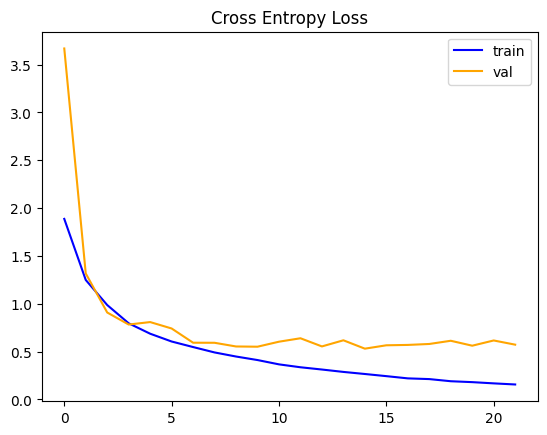

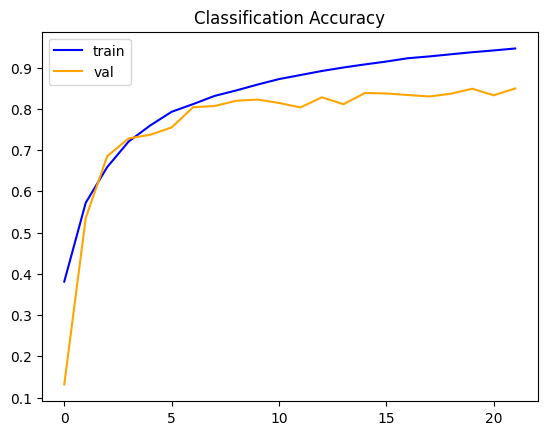

In [12]:
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='train')
plt.plot(history1.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

### 1-3) Evaluation

In [13]:
_, acc1 = model1.evaluate(x_test/255.0, y_test, verbose=0)
print('> %.3f' % (acc1 * 100.0))

> 83.570


## Model 2: Based on VGG16
This model is based on VGG16 but adjusted for the CIFAR10 dataset.

### 2-1) Model Architecture

In [ ]:
model2 = ks.Sequential()

model2.add(ks.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3),strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.3))
model2.add(ks.layers.Conv2D(64, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())

model2.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(ks.layers.Conv2D(128, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.4))
model2.add(ks.layers.Conv2D(128, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())

model2.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(ks.layers.Conv2D(256, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.4))
model2.add(ks.layers.Conv2D(256, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.4))
model2.add(ks.layers.Conv2D(256, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())

model2.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.4))
model2.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.4))
model2.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())

model2.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.4))
model2.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.4))
model2.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model2.add(ks.layers.BatchNormalization())

model2.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(ks.layers.Dropout(0.5))

model2.add(ks.layers.Flatten())
model2.add(ks.layers.Dense(512, activation='relu'))
model2.add(ks.layers.BatchNormalization())
model2.add(ks.layers.Dropout(0.5))

model2.add(ks.layers.Dense(10, activation='softmax'))

In [ ]:
# Model2 summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)      

### 2-2) Training

In [ ]:
# Optimizer and metrics
model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callbacks
es21 = ks.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
es22 = ks.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

In [ ]:
# Train
history2 = model2.fit(x_train/255.0, y_train,
                    epochs=250,
                    callbacks=[es21, es22],
                    use_multiprocessing=False,
                    batch_size= 128,
                    validation_data=(x_val/255.0, y_val)
                    )

Epoch 1/250
313/313 [==============================] - 37s 83ms/step - loss: 2.2610 - accuracy: 0.2243 - val_loss: 4.9023 - val_accuracy: 0.0951
Epoch 2/250
313/313 [==============================] - 26s 84ms/step - loss: 1.7217 - accuracy: 0.3691 - val_loss: 3.5585 - val_accuracy: 0.2470
Epoch 3/250
313/313 [==============================] - 26s 83ms/step - loss: 1.3905 - accuracy: 0.4961 - val_loss: 1.6132 - val_accuracy: 0.5112
Epoch 4/250
313/313 [==============================] - 26s 83ms/step - loss: 1.1382 - accuracy: 0.5997 - val_loss: 1.2230 - val_accuracy: 0.5878
Epoch 5/250
313/313 [==============================] - 25s 79ms/step - loss: 0.9724 - accuracy: 0.6578 - val_loss: 0.9605 - val_accuracy: 0.6816
Epoch 6/250
313/313 [==============================] - 26s 83ms/step - loss: 0.8612 - accuracy: 0.7028 - val_loss: 1.0295 - val_accuracy: 0.6717
Epoch 7/250
313/313 [==============================] - 25s 79ms/step - loss: 0.7716 - accuracy: 0.7392 - val_loss: 0.8790 - val_ac

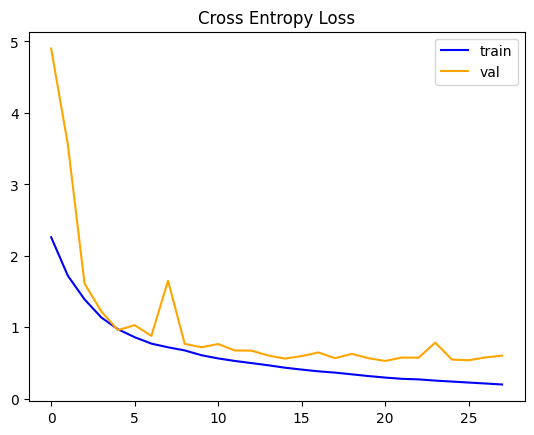

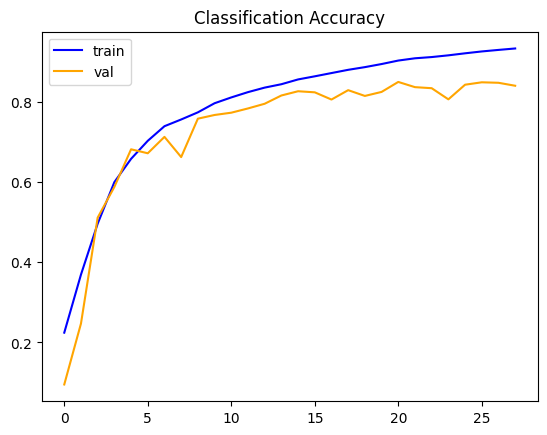

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

### 2-3) Evaluation

In [ ]:
_, acc2 = model2.evaluate(x_test/255.0, y_test, verbose=0)
print('> %.3f' % (acc2 * 100.0))

> 84.700


## Model 3: Data Augmentation
Since the images in this dataset are small in size (32x32), the only data augmentation that makes sense is horizontal flipping.

### 3-1) Data Augmentation

In [ ]:
# Train set
train_datagen3 = ks.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    )

train_generator3 = train_datagen3.flow(
    x_train,
    y_train_encoded,
    batch_size=128
)

# Validation set
val_datagen3 = ks.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    )

val_generator3 = val_datagen3.flow(
    x_val,
    y_val_encoded,
    batch_size=128
)

### 3-2) Model Architecture

In [ ]:
model3 = ks.Sequential()

model3.add(ks.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3),strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.3))
model3.add(ks.layers.Conv2D(64, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())

model3.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(ks.layers.Conv2D(128, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.4))
model3.add(ks.layers.Conv2D(128, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())

model3.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(ks.layers.Conv2D(256, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.4))
model3.add(ks.layers.Conv2D(256, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.4))
model3.add(ks.layers.Conv2D(256, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())

model3.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.4))
model3.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.4))
model3.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())

model3.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.4))
model3.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.4))
model3.add(ks.layers.Conv2D(512, (3, 3), padding='same',strides=1, activation='relu'))
model3.add(ks.layers.BatchNormalization())

model3.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(ks.layers.Dropout(0.5))

model3.add(ks.layers.Flatten())
model3.add(ks.layers.Dense(512, activation='relu'))
model3.add(ks.layers.BatchNormalization())
model3.add(ks.layers.Dropout(0.5))

model3.add(ks.layers.Dense(10, activation='softmax'))

In [ ]:
# model3 summary
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_23 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)      

### 3-3) Training

In [ ]:
# Optimizer and metrics
model3.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Early stopping callbacks
es31 = ks.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
es32 = ks.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

In [ ]:
# Train
history3 = model3.fit(train_generator3,
                      epochs=250,
                      validation_data=val_generator3,
                      steps_per_epoch= x_train.shape[0] // 128,
                      validation_steps=x_val.shape[0] // 128,
                      callbacks=[es32, es31]
                      )

Epoch 1/250
312/312 [==============================] - 38s 87ms/step - loss: 2.2144 - accuracy: 0.2406 - val_loss: 2.6334 - val_accuracy: 0.1385
Epoch 2/250
312/312 [==============================] - 27s 86ms/step - loss: 1.6180 - accuracy: 0.4171 - val_loss: 1.8686 - val_accuracy: 0.3677
Epoch 3/250
312/312 [==============================] - 27s 85ms/step - loss: 1.3074 - accuracy: 0.5323 - val_loss: 1.3580 - val_accuracy: 0.5458
Epoch 4/250
312/312 [==============================] - 26s 82ms/step - loss: 1.0792 - accuracy: 0.6219 - val_loss: 1.1902 - val_accuracy: 0.6113
Epoch 5/250
312/312 [==============================] - 27s 85ms/step - loss: 0.9462 - accuracy: 0.6738 - val_loss: 0.9316 - val_accuracy: 0.6949
Epoch 6/250
312/312 [==============================] - 26s 82ms/step - loss: 0.8225 - accuracy: 0.7185 - val_loss: 0.8618 - val_accuracy: 0.7196
Epoch 7/250
312/312 [==============================] - 27s 85ms/step - loss: 0.7576 - accuracy: 0.7446 - val_loss: 0.8002 - val_ac

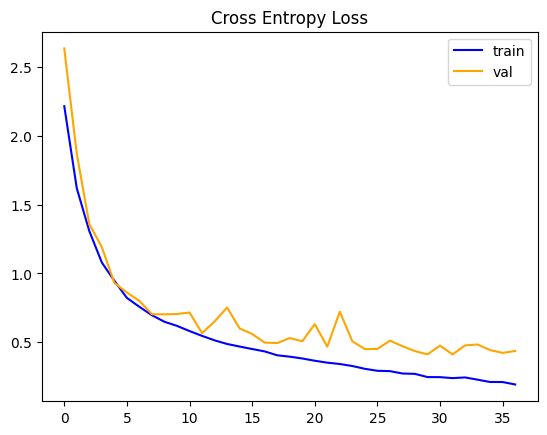

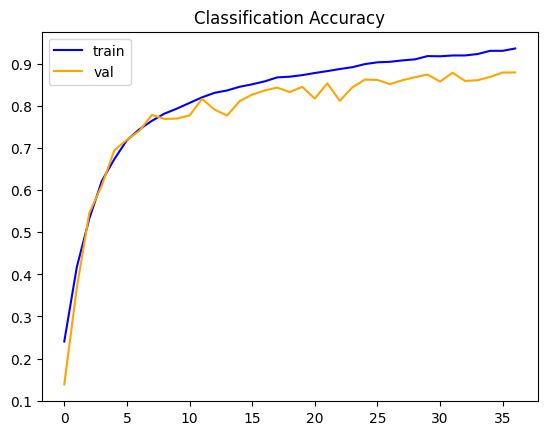

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history3.history['loss'], color='blue', label='train')
plt.plot(history3.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='blue', label='train')
plt.plot(history3.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

### 3-4) Evaluation

In [ ]:
_, acc3 = model3.evaluate(x_test/255.0, y_test_encoded, verbose=0)
print('> %.3f' % (acc3 * 100.0))

> 86.920


## Model 4: Transfer Learning With Fine Tuning
For this model, we will import the VGG16 model with ImageNet weights.
This model was trained on images of size 224x224, so we will have to resize the CIFAR10 images to a size of 48x48, which is the minimum size accepted by VGG16.

### 4-1) Model Architecture

In [ ]:
# Import VGG16 model
vgg4 = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg4.layers:
    print(layer.name, layer.trainable)

input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
vgg4.trainable = True

trainable = False
for layer in vgg4.layers:
  if layer.name=='block4_conv1':
    trainable = True

  layer.trainable = trainable

In [ ]:
for layer in vgg4.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
model4 = ks.Sequential()

model4.add(vgg4)
model4.add(ks.layers.Flatten())
model4.add(ks.layers.Dense(512, activation='relu'))
model4.add(ks.layers.BatchNormalization())
model4.add(ks.layers.Dropout(0.5))
model4.add(ks.layers.Dense(10, activation='softmax'))

In [ ]:
# model4 summary
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_37 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                      

### 4-2) Training

In [ ]:
# Optimizer and metrics
new_adam = ks.optimizers.Adam(learning_rate=2e-5)

model4.compile(loss='sparse_categorical_crossentropy',
               optimizer=new_adam,
               metrics=['accuracy']
               )

In [ ]:
# Early stopping callbacks
es41 = ks.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
es42 = ks.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

In [ ]:
# Train
history4 = model4.fit(x_train_resized/255.0, y_train,
                    epochs=250,
                    callbacks=[es41, es42],
                    use_multiprocessing=False,
                    batch_size= 128,
                    validation_data=(x_val_resized/255.0, y_val)
                    )

Epoch 1/250
313/313 [==============================] - 33s 86ms/step - loss: 1.3791 - accuracy: 0.5494 - val_loss: 0.8843 - val_accuracy: 0.7295
Epoch 2/250
313/313 [==============================] - 22s 70ms/step - loss: 0.7429 - accuracy: 0.7484 - val_loss: 0.6142 - val_accuracy: 0.7889
Epoch 3/250
313/313 [==============================] - 22s 69ms/step - loss: 0.5753 - accuracy: 0.8042 - val_loss: 0.5559 - val_accuracy: 0.8100
Epoch 4/250
313/313 [==============================] - 22s 69ms/step - loss: 0.4513 - accuracy: 0.8451 - val_loss: 0.5373 - val_accuracy: 0.8185
Epoch 5/250
313/313 [==============================] - 22s 69ms/step - loss: 0.3605 - accuracy: 0.8788 - val_loss: 0.5036 - val_accuracy: 0.8308
Epoch 6/250
313/313 [==============================] - 22s 70ms/step - loss: 0.2675 - accuracy: 0.9093 - val_loss: 0.4919 - val_accuracy: 0.8422
Epoch 7/250
313/313 [==============================] - 21s 69ms/step - loss: 0.1928 - accuracy: 0.9372 - val_loss: 0.5350 - val_ac

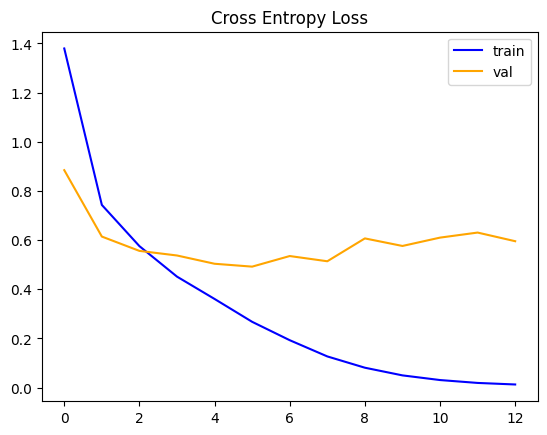

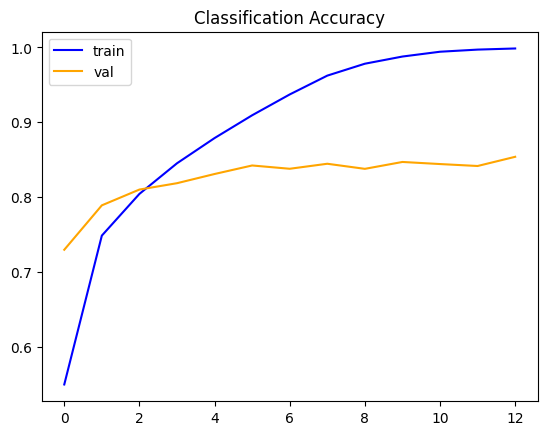

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history4.history['loss'], color='blue', label='train')
plt.plot(history4.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history4.history['accuracy'], color='blue', label='train')
plt.plot(history4.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

### 4-3) Evaluation

In [ ]:
_, acc4 = model4.evaluate(x_test_resized/255.0, y_test_encoded, verbose=0)
print('> %.3f' % (acc4 * 100.0))

> 83.250


## Model 5: Transfer Learning With Fine Tuning and Data Augmentation
Since the input images are resized to 48x48, we can add more augmentaions such as rotation, width shift and height shift.

### 5-1) Data Augmentation

In [ ]:
# Train set
train_datagen5 = ks.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    )

train_generator5 = train_datagen5.flow(
    x_train_resized,
    y_train_encoded,
    batch_size=128
)

# Validation set
val_datagen5 = ks.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    )

val_generator5 = val_datagen5.flow(
    x_val_resized,
    y_val_encoded,
    batch_size=128
)

### 5-2) Model Architecture

In [ ]:
# Import VGG16 model
vgg5 = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

In [ ]:
vgg5.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
for layer in vgg5.layers:
    print(layer.name, layer.trainable)

input_2 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
vgg5.trainable = True

trainable = False
for layer in vgg5.layers:
  if layer.name=='block4_conv1':
    trainable = True

  layer.trainable = trainable

In [ ]:
for layer in vgg5.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
model5 = ks.Sequential()

model5.add(vgg5)
model5.add(ks.layers.Flatten())
model5.add(ks.layers.Dense(512, activation='relu', input_shape=(512,)))
model5.add(ks.layers.BatchNormalization())
model5.add(ks.layers.Dropout(0.5))
model5.add(ks.layers.Dense(10, activation='softmax'))

In [ ]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_38 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                      

### 5-3) Training

In [ ]:
new_adam = ks.optimizers.Adam(learning_rate=2e-5)

model5.compile(loss='sparse_categorical_crossentropy',
               optimizer=new_adam,
               metrics=['accuracy']
               )

In [ ]:
# Early stopping callbacks
es51 = ks.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
es52 = ks.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

In [ ]:
# Train
history5 = model5.fit(train_generator5,
                      epochs=250,
                      validation_data=val_generator5,
                      steps_per_epoch= x_train.shape[0] // 128,
                      validation_steps=x_val.shape[0] // 128,
                      callbacks=[es51, es52]
                      )

Epoch 1/250
312/312 [==============================] - 48s 142ms/step - loss: 1.6045 - accuracy: 0.4752 - val_loss: 1.0018 - val_accuracy: 0.6937
Epoch 2/250
312/312 [==============================] - 45s 144ms/step - loss: 1.0283 - accuracy: 0.6508 - val_loss: 0.7086 - val_accuracy: 0.7561
Epoch 3/250
312/312 [==============================] - 44s 141ms/step - loss: 0.8656 - accuracy: 0.7072 - val_loss: 0.6351 - val_accuracy: 0.7773
Epoch 4/250
312/312 [==============================] - 44s 140ms/step - loss: 0.7714 - accuracy: 0.7359 - val_loss: 0.5810 - val_accuracy: 0.8009
Epoch 5/250
312/312 [==============================] - 45s 143ms/step - loss: 0.7015 - accuracy: 0.7612 - val_loss: 0.5863 - val_accuracy: 0.8020
Epoch 6/250
312/312 [==============================] - 44s 140ms/step - loss: 0.6590 - accuracy: 0.7751 - val_loss: 0.5230 - val_accuracy: 0.8228
Epoch 7/250
312/312 [==============================] - 45s 143ms/step - loss: 0.6148 - accuracy: 0.7897 - val_loss: 0.4850 -

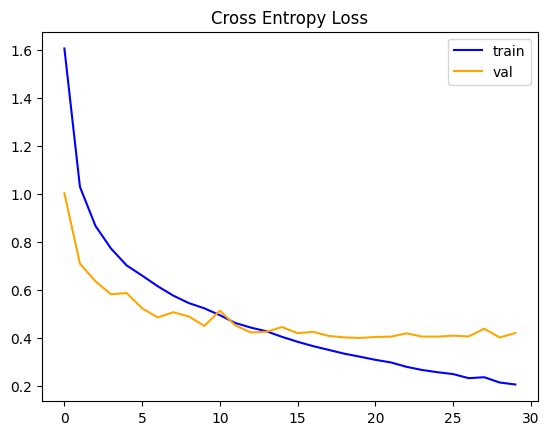

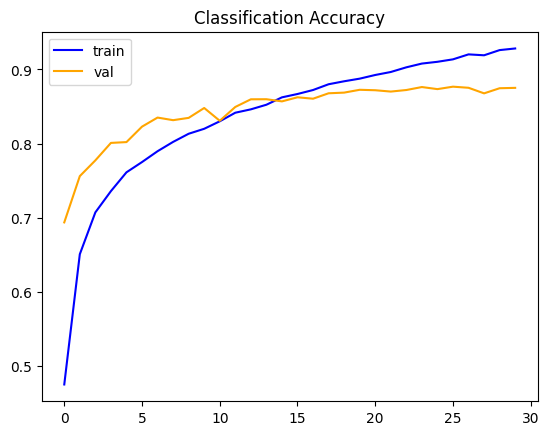

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history5.history['loss'], color='blue', label='train')
plt.plot(history5.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history5.history['accuracy'], color='blue', label='train')
plt.plot(history5.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

### 5-4) Evaluation

In [ ]:
_, acc5 = model5.evaluate(x_test_resized/255.0, y_test_encoded, verbose=0)
print('> %.3f' % (acc5 * 100.0))

> 86.230


# III- Models Comparison

In [1]:
print('Base model:                                               %.3f' % (acc1 * 100.0))
print('Advanced model based on VGG16:                            %.3f' % (acc2 * 100.0))
print('Model with simple data augmentation:                      %.3f' % (acc3 * 100.0))
print('Transfer learning with fine tuning:                       %.3f' % (acc4 * 100.0))
print('Transfer learning with fine tuning and data augmentation: %.3f' % (acc5 * 100.0))

Base model:                                               83.570
Advanced model based on VGG16:                            84.700
Model with simple data augmentation:                      86.920
Transfer learning with fine tuning:                       83.250
Transfer learning with fine tuning and data augmentation: 86.230


In [4]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

In [5]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


313/313 [==============================] - 49s 155ms/step


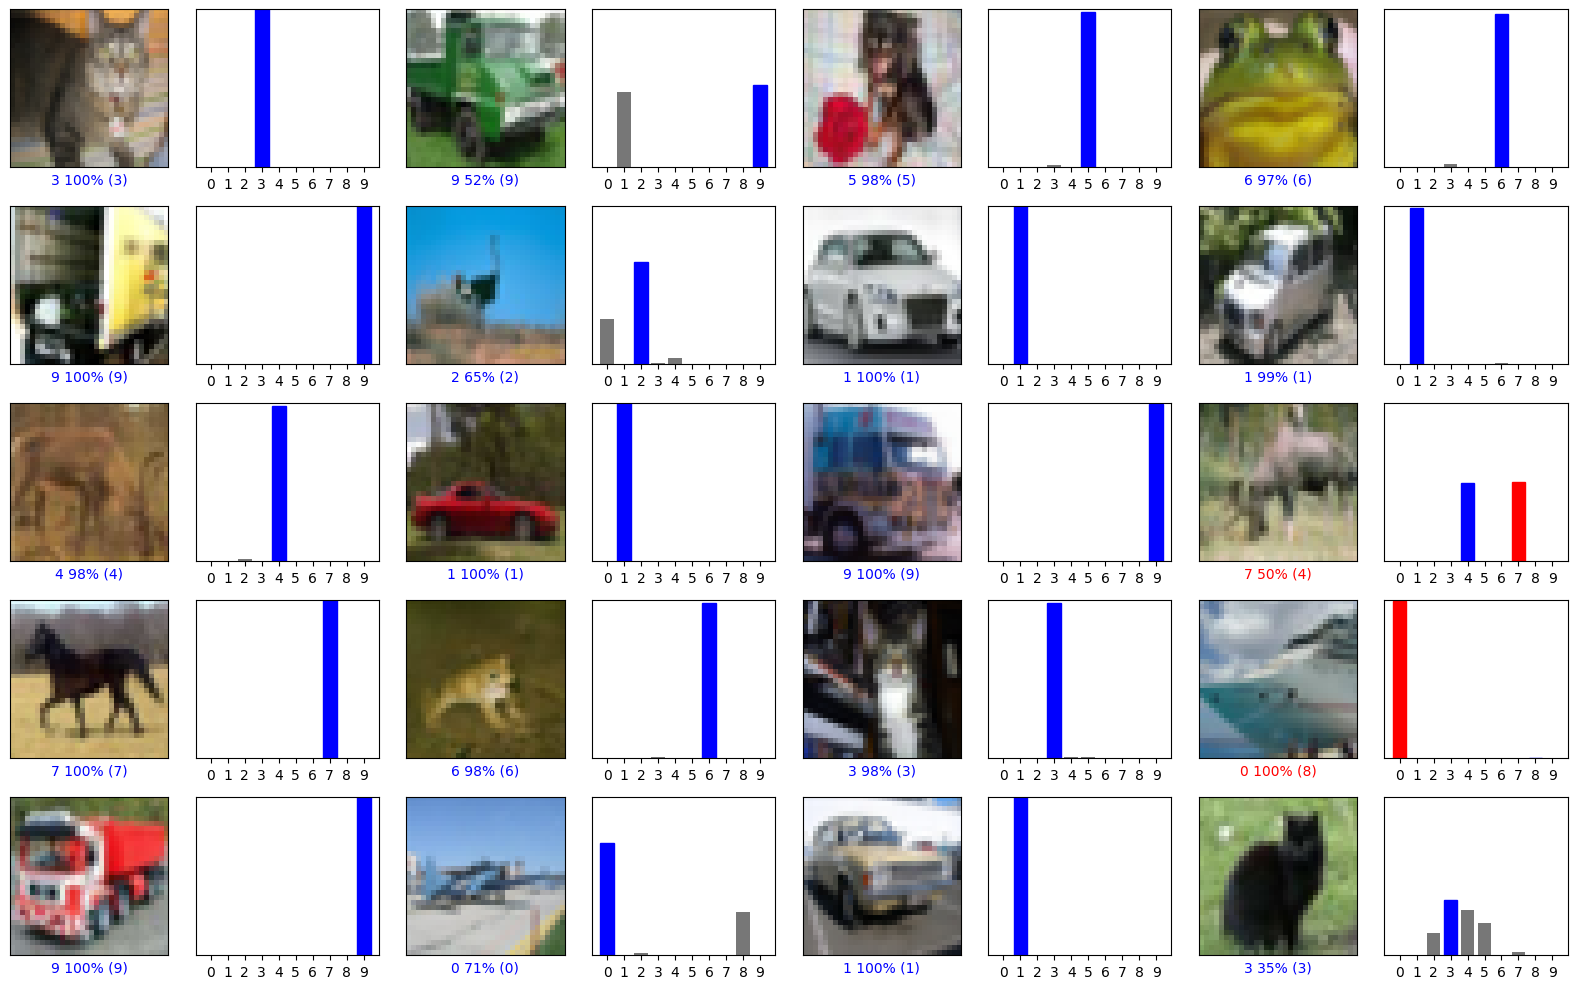

In [7]:
preds1 = model1.predict(x_test/255.0)

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, preds1[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, preds1[i+start], y_test)
plt.tight_layout()
plt.show()

313/313 [==============================] - 3s 8ms/step


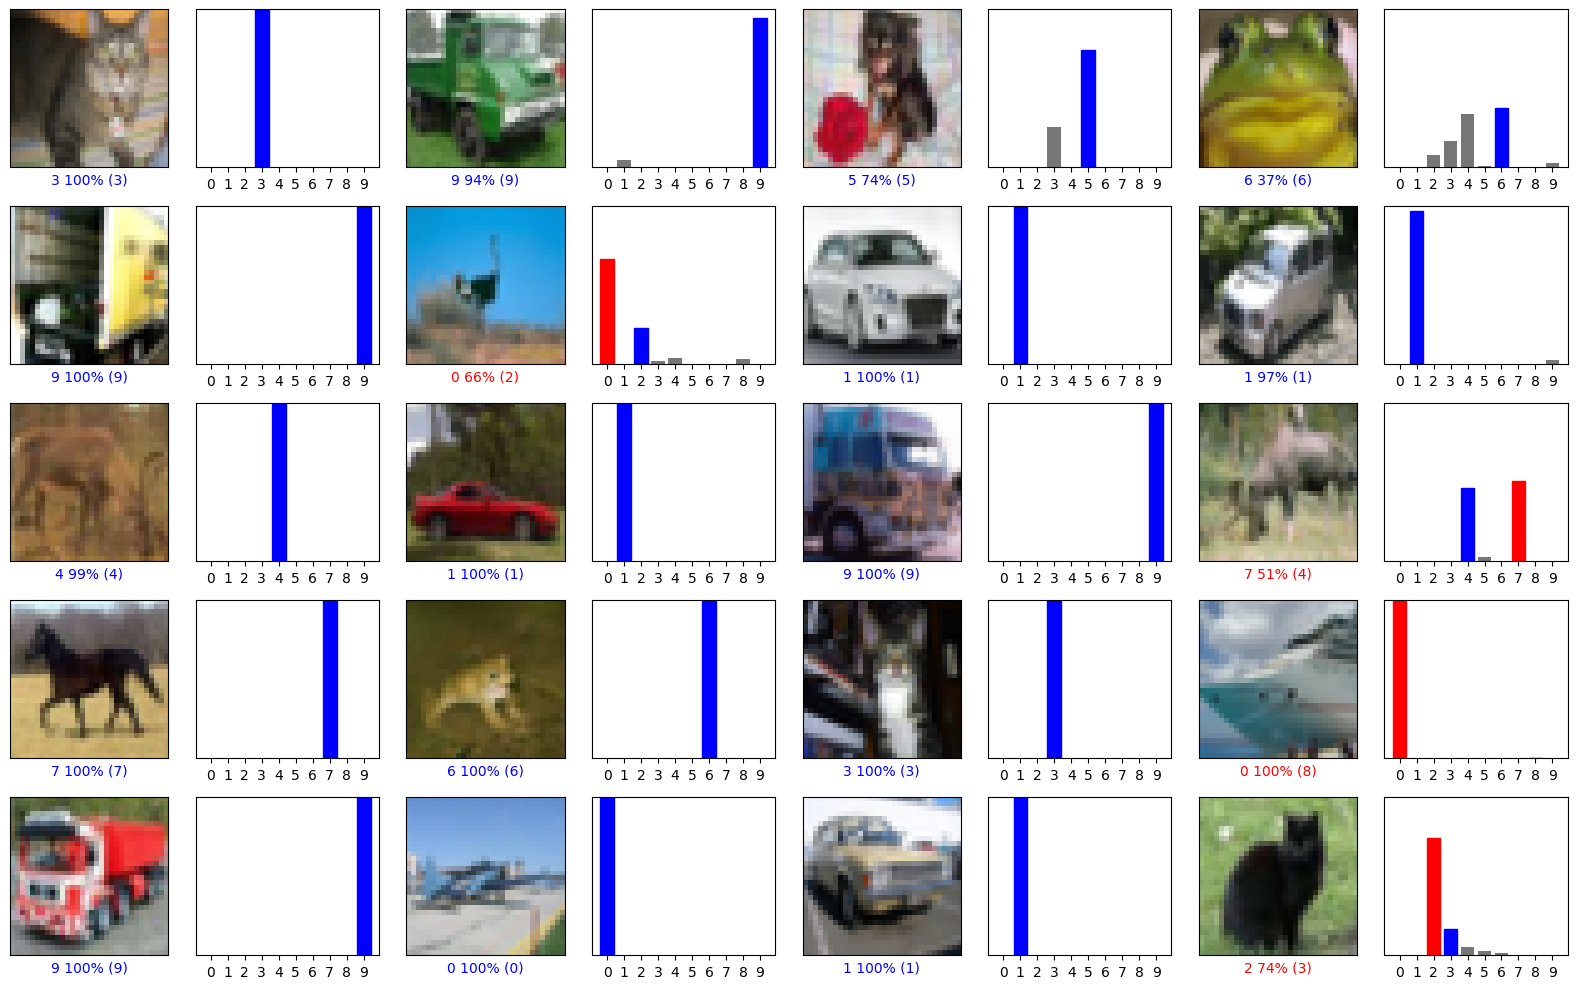

In [ ]:
preds2 = model2.predict(x_test/255.0)

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, preds2[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, preds2[i+start], y_test)
plt.tight_layout()
plt.show()

313/313 [==============================] - 3s 8ms/step


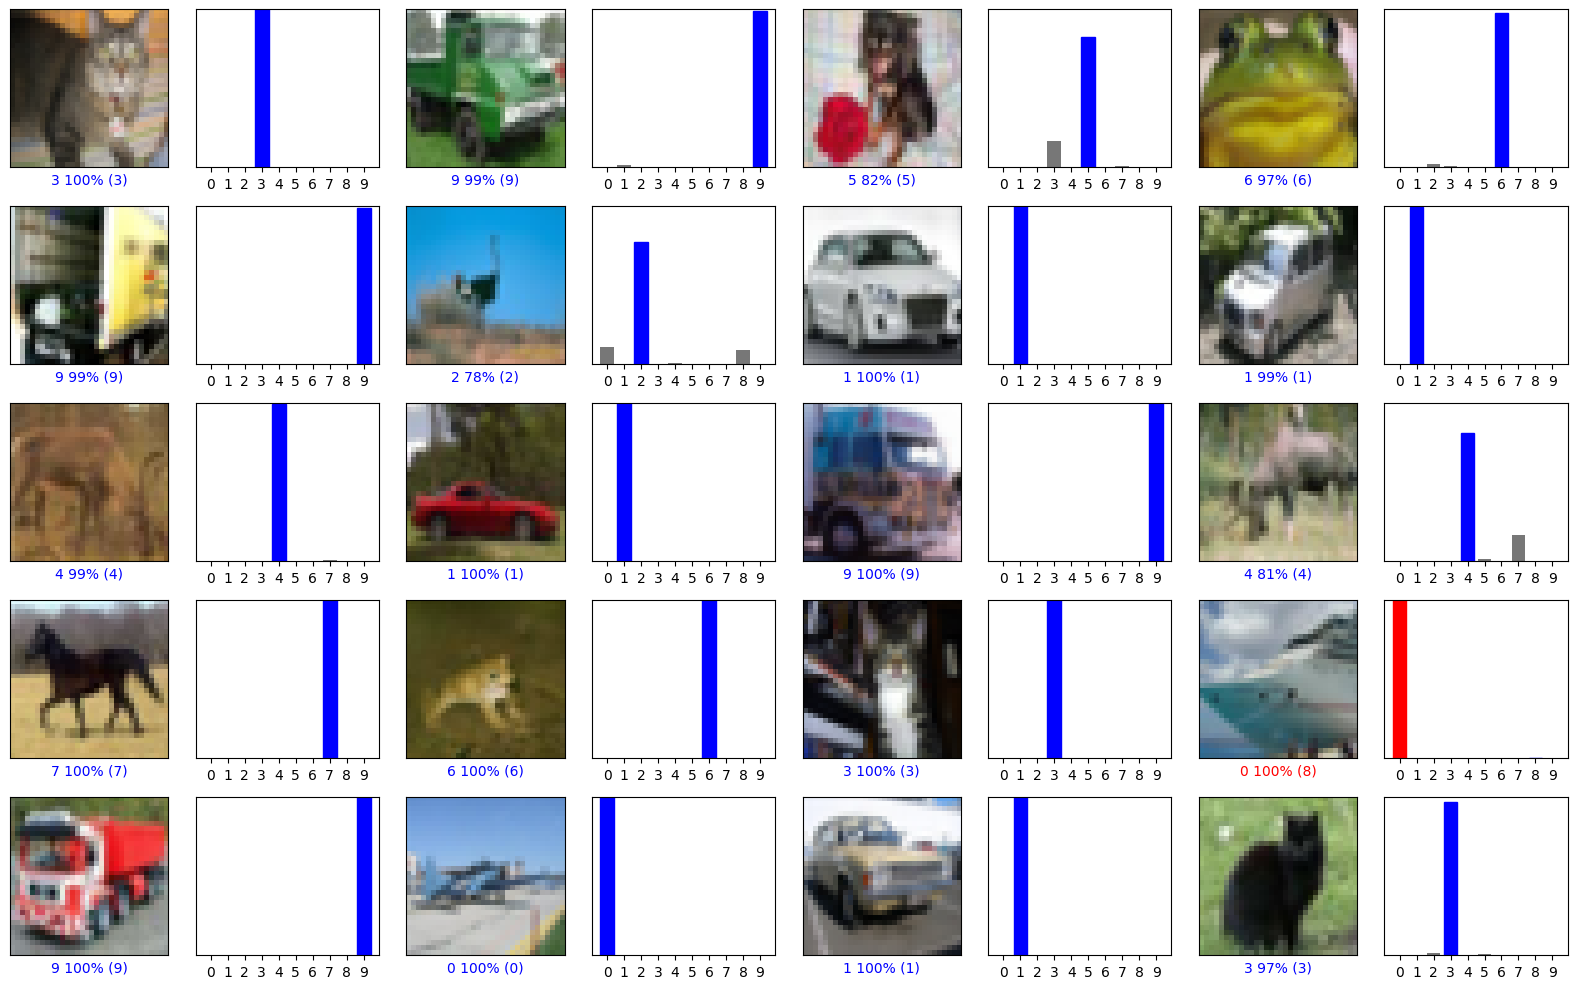

In [ ]:
preds3 = model3.predict(x_test/255.0)

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, preds3[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, preds3[i+start], y_test)
plt.tight_layout()
plt.show()

313/313 [==============================] - 4s 11ms/step


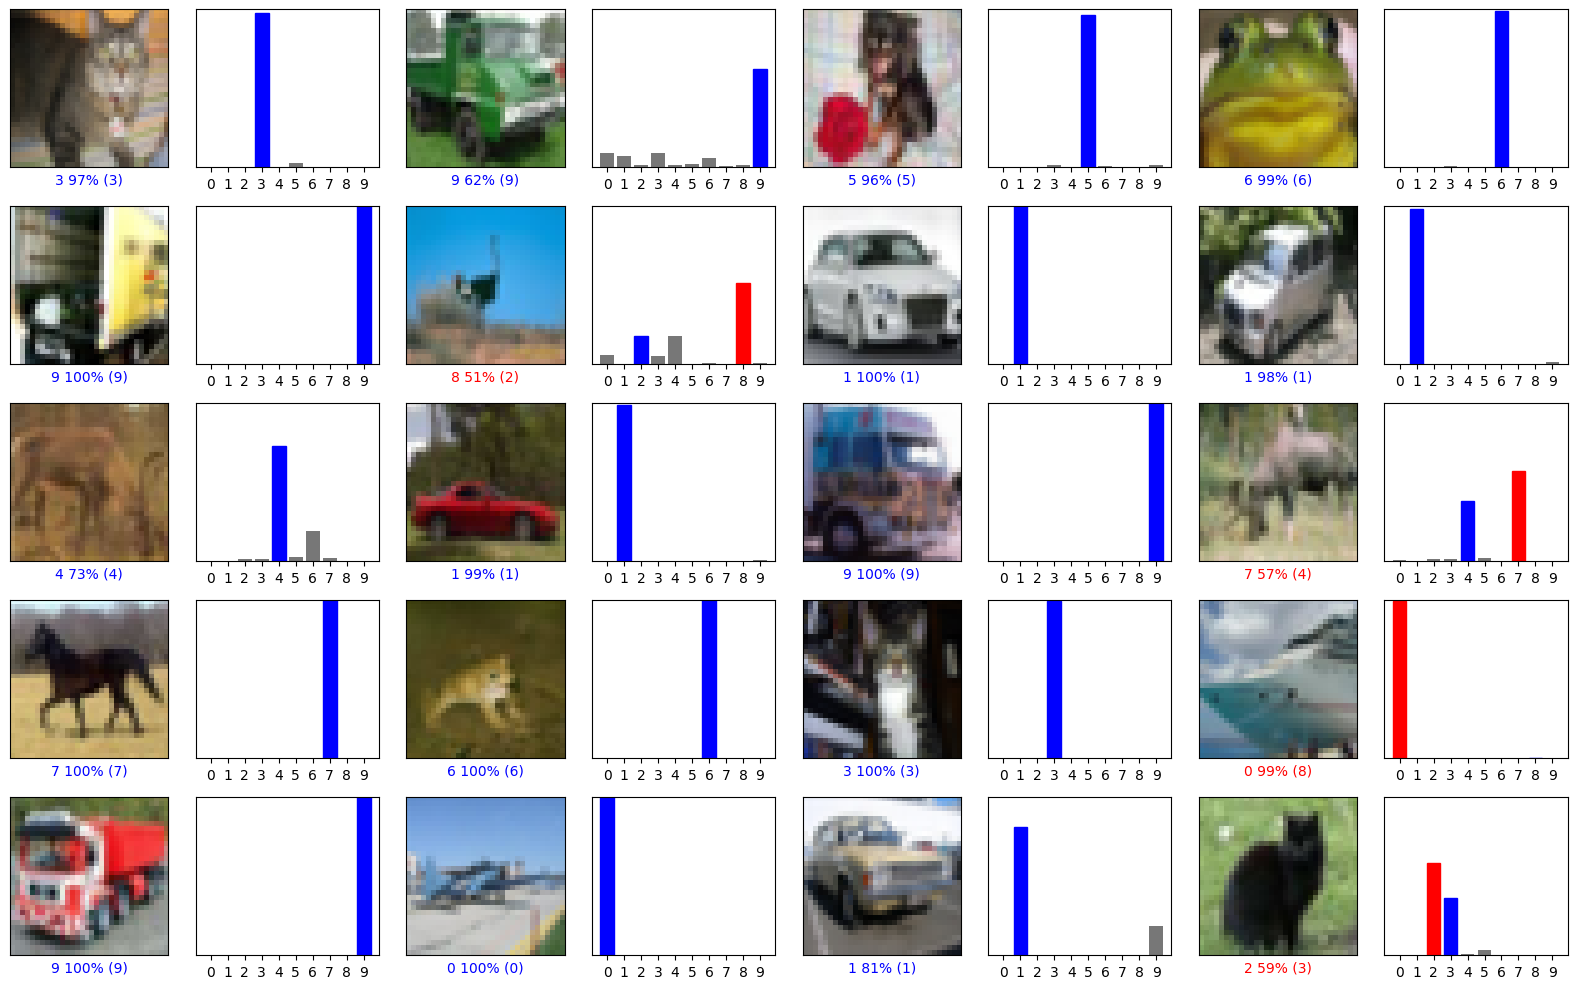

In [ ]:
preds4 = model4.predict(x_test_resized/255.0)

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, preds4[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, preds4[i+start], y_test)
plt.tight_layout()
plt.show()

313/313 [==============================] - 4s 11ms/step


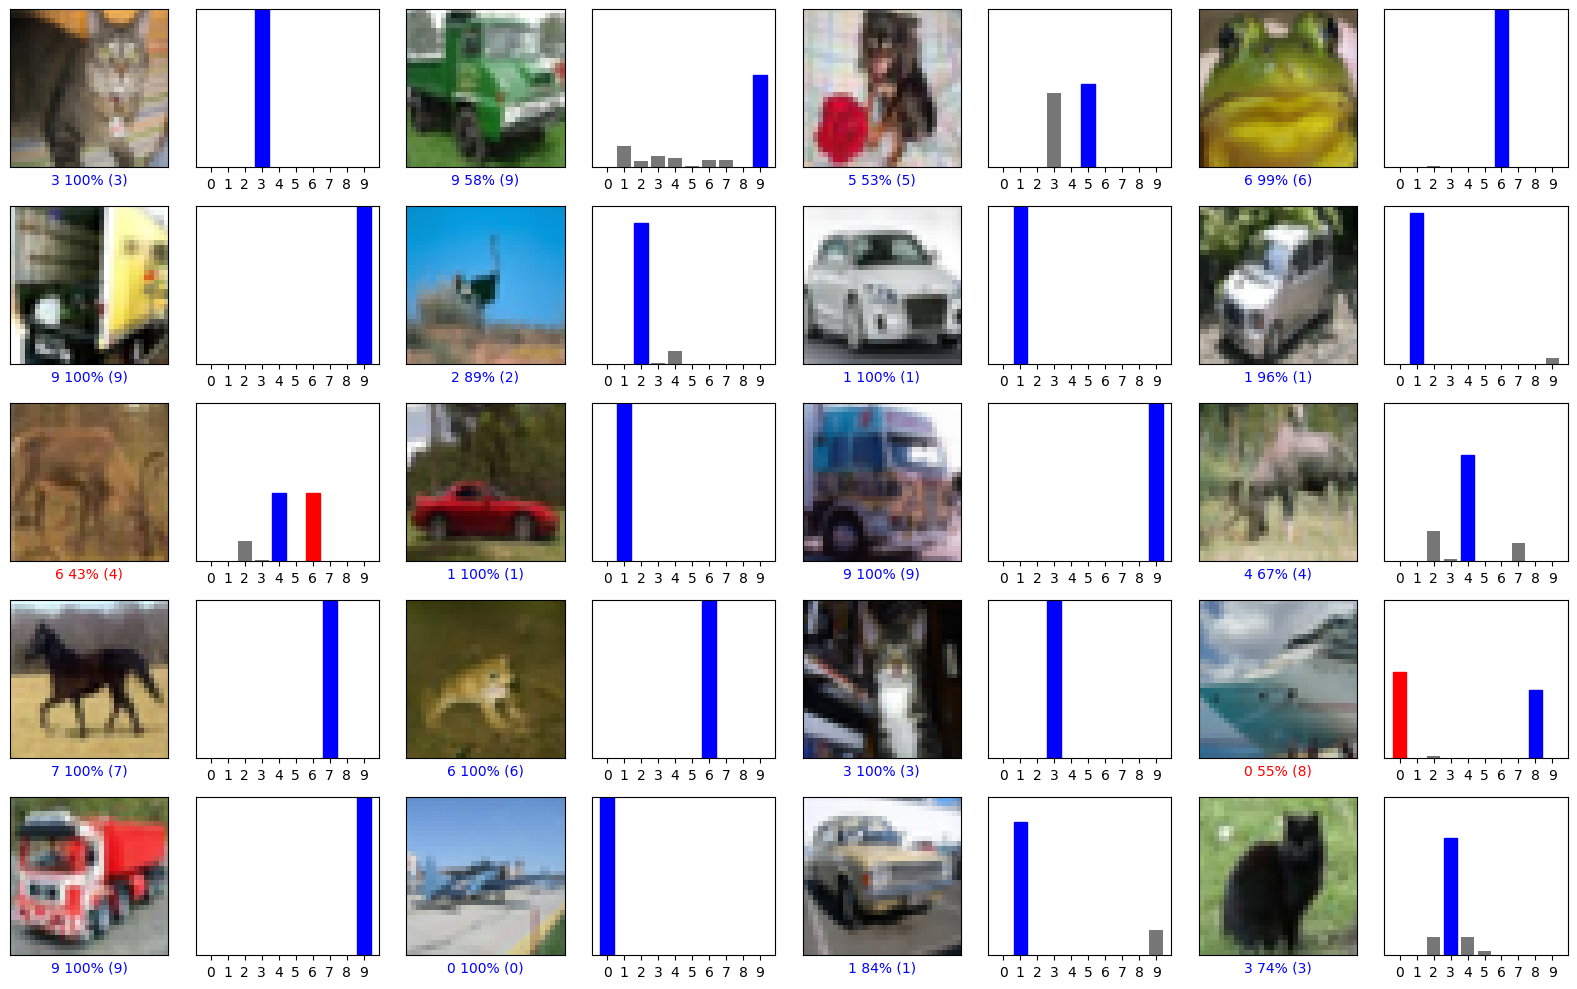

In [ ]:
preds5 = model5.predict(x_test_resized/255.0)

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, preds5[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, preds5[i+start], y_test)
plt.tight_layout()
plt.show()

# IV- Conclusion

The models used had all almost the same accuracy, but we can clearly see that the models with data augmentation had a slightly better accuracy.

One more thing to note is that transfer learning didn't help much in this case. This could be because the images are small in size or because the model used was already based on VGG16 so there was nothing to ameliorate other than the model training speed.